In [1]:
import pyspark as ps
import pandas as pda
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [2]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('Missing').getOrCreate()

In [3]:
## Read The dataset
df = spark.read.csv('Dataset US international travel.csv',header=True,inferSchema=True)

# df_pan = df.toPandas()
# df_pan

In [4]:
## Store to db
conn = sqlite3.connect('C:/Users/sjsa3/Downloads/Only_once/DataSchool/my_data.db')
df_pan = pda.read_sql('SELECT * FROM data', conn)
conn.close()

In [ ]:
## desc
df.describe(['Scheduled_departures']).show()

+-------+--------------------+
|summary|Scheduled_departures|
+-------+--------------------+
|  count|              997555|
|   mean|   39.27419340287002|
| stddev|   60.13656794197742|
|    min|                   0|
|    max|                2019|
+-------+--------------------+



In [5]:
df.printSchema()
df_pan.columns

root
 |-- Date: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- DoW: string (nullable = true)
 |-- Airport Code: string (nullable = true)
 |-- Foriegn Airport code: string (nullable = true)
 |-- Airline code: string (nullable = true)
 |-- Airline: string (nullable = true)
 |-- Domestic US airline: integer (nullable = true)
 |-- US State: string (nullable = true)
 |-- US City: string (nullable = true)
 |-- US Airport name: string (nullable = true)
 |-- World Region: string (nullable = true)
 |-- Foreign country: string (nullable = true)
 |-- Foreign city: string (nullable = true)
 |-- Foreign Airport name: string (nullable = true)
 |-- Scheduled_departures: integer (nullable = true)
 |-- Chartered_departures: integer (nullable = true)
 |-- Scheduled_seats: integer (nullable = true)
 |-- Chartered_seats: integer (nullable = true)
 |-- Scheduled_passengers: integer (nullable = true)
 |-- Chartered_passengers: integer (nullable = tru

,Date,Year,Month,DoW,Airport Code,Foriegn Airport code,Airline code,Airline,Domestic US airline,US State,...,Foreign city,Foreign Airport name,Scheduled_departures,Chartered_departures,Scheduled_seats,Chartered_seats,Scheduled_passengers,Chartered_passengers,Scheduled_freight,Chartered_freight
0,2011-04-01 00:00:00,2011,4,Friday,MIA,WDH,WI,Sky Lease Cargo,1,FL,...,Windhoek,Hosea Kutako International,1,0,0,0,0,0,32,0
1,2016-09-01 00:00:00,2016,9,Thursday,SJU,WDH,DL,Delta Air Lines Inc.,1,PR,...,Windhoek,Hosea Kutako International,1,0,291,0,247,0,3,0
2,2008-02-01 00:00:00,2008,2,Friday,ATL,WDH,WO,World Airways Inc.,1,GA,...,Windhoek,Hosea Kutako International,0,1,0,291,0,0,0,0
3,2015-04-01 00:00:00,2015,4,Wednesday,FLL,WDH,LDM,Lauda Motion GmbH,0,FL,...,Windhoek,Hosea Kutako International,0,1,0,12,0,2,0,0
4,2016-07-01 00:00:00,2016,7,Friday,MCO,WDH,1ZQ,Comlux Aruba NV,0,FL,...,Windhoek,Hosea Kutako International,0,1,0,63,0,48,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997550,1994-09-01 00:00:00,1994,9,Thursday,BDL,KEP,CDQ,Kitty Hawk International,1,CT,...,Nepalganj,Nepalgunj,0,1,0,0,0,0,0,19
997551,2021-05-01 00:00:00,2021,5,Saturday,RDU,KTM,10Q,Swiss Air Ambulance,0,NC,...,Kathmandu,Tribhuvan International,0,1,0,11,0,1,0,0
997552,2013-10-01 00:00:00,2013,10,Tuesday,ORD,KTM,5Y,Atlas Air Inc.,1,IL,...,Kathmandu,Tribhuvan International,0,1,0,0,0,0,0,40
997553,2007-11-01 00:00:00,2007,11,Thursday,SJU,BGL,FE,Primaris Airlines Inc.,1,PR,...,Baglung,Baglung Airport,0,1,0,200,0,65,0,0


: 

In [14]:
df_pan[df_pan['World Region'].str.contains('Central Asia')]

,Date,Year,Month,DoW,Airport Code,Foriegn Airport code,Airline code,Airline,Domestic US airline,US State,...,Foreign city,Foreign Airport name,Scheduled_departures,Chartered_departures,Scheduled_seats,Chartered_seats,Scheduled_passengers,Chartered_passengers,Scheduled_freight,Chartered_freight
103706,2008-12-01 00:00:00,2008,12,Monday,TEB,ALA,0CQ,ACM AIR CHARTER GmbH,0,NJ,...,Almaty,Almaty Airport,0,1,0,14,0,6,0,0
103707,2008-08-01 00:00:00,2008,8,Friday,TEB,ALA,0CQ,ACM AIR CHARTER GmbH,0,NJ,...,Almaty,Almaty Airport,0,1,0,14,0,3,0,0
103708,2009-01-01 00:00:00,2009,1,Thursday,EWR,ALA,0CQ,ACM AIR CHARTER GmbH,0,NJ,...,Almaty,Almaty Airport,0,1,0,14,0,4,0,0
103709,2021-06-01 00:00:00,2021,6,Tuesday,GUM,KGF,N8,National Air Cargo Group Inc d/ba National Air...,1,TT,...,Karaganda,Karaganda Airport,0,1,0,0,0,0,0,13
103710,2007-12-01 00:00:00,2007,12,Saturday,FL3,TSE,F2,Omega Air Holdings d/b/a Focus Air,1,FL,...,Astana,Nursultan Nazarbayev International,1,0,0,0,0,0,86,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921820,2006-10-01 00:00:00,2006,10,Sunday,FL3,FRU,5Y,Atlas Air Inc.,1,FL,...,Bishkek,Manas,0,2,0,0,0,0,0,211
921821,2010-02-01 00:00:00,2010,2,Monday,SUU,FRU,5Y,Atlas Air Inc.,1,CA,...,Bishkek,Manas,0,1,0,0,0,0,0,0
921822,2007-08-01 00:00:00,2007,8,Wednesday,CLU,FRU,RD,Ryan International Airlines,1,IN,...,Bishkek,Manas,0,2,0,420,0,278,0,0
921823,2005-05-01 00:00:00,2005,5,Sunday,ZZZ,FRU,RD,Ryan International Airlines,1,None,...,Bishkek,Manas,0,1,0,210,0,20,0,0


In [12]:
## Unique values
## null_value = df_pan[df_pan.isnull().any(axis=1)]

df_pan [ (df_pan ['Domestic US airline' ] == 0) & 
        (df_pan ['US State' ].isnull() ) ] 

,Date,Year,Month,DoW,Airport Code,Foriegn Airport code,Airline code,Airline,Domestic US airline,US State,...,Foreign city,Foreign Airport name,Scheduled_departures,Chartered_departures,Scheduled_seats,Chartered_seats,Scheduled_passengers,Chartered_passengers,Scheduled_freight,Chartered_freight
80855,2007-10-01 00:00:00,2007,10,Monday,NKT,SNN,POQ,Polyot Airlines,0,None,...,Shannon,Shannon Airport,0,1,0,0,0,0,0,40
81118,1991-03-01 00:00:00,1991,3,Friday,XMR,SNN,WAQ,Air Charter Systems (Acs),0,None,...,Shannon,Shannon Airport,0,1,0,0,0,0,0,15
243549,1992-03-01 00:00:00,1992,3,Sunday,XMR,TRN,CV,Cargolux Airlines International S.A,0,None,...,Turin,Torino,0,1,0,0,0,0,0,69
472953,1990-08-01 00:00:00,1990,8,Wednesday,XMR,MEX,AF,Compagnie Natl Air France,0,None,...,Mexico City,Licenciado Benito Juarez International,1,0,0,0,0,0,49,0
614577,2007-05-01 00:00:00,2007,5,Tuesday,NKT,SMA,POQ,Polyot Airlines,0,None,...,Santa Maria,Santa Maria Airport,0,1,0,0,0,0,0,20
637718,2010-04-01 00:00:00,2010,4,Thursday,NKT,YQX,VIQ,Volga-Dnepr Airlines,0,None,...,Gander,Gander International,0,1,0,0,0,0,0,19
637719,2007-09-01 00:00:00,2007,9,Saturday,NKT,YQX,VIQ,Volga-Dnepr Airlines,0,None,...,Gander,Gander International,0,1,0,0,0,0,0,36
638056,2010-04-01 00:00:00,2010,4,Thursday,NKT,YJT,VIQ,Volga-Dnepr Airlines,0,None,...,Stephenville,Stephenville Airport,0,2,0,0,0,0,0,20
758603,1991-02-01 00:00:00,1991,2,Friday,NKT,YQX,WAQ,Air Charter Systems (Acs),0,None,...,Gander,Gander International,0,2,0,0,0,0,0,69
777740,1990-11-01 00:00:00,1990,11,Thursday,XMR,YQR,HLQ,Heavylift Cargo Airlines Lt,0,None,...,Regina,Regina International,0,1,0,0,0,0,0,17


In [9]:
## Pivot
pivotDF = df.groupBy("Month").pivot("Year").sum("Scheduled_departures")
pivotDF.printSchema()


root
 |-- Month: integer (nullable = true)
 |-- 1990: long (nullable = true)
 |-- 1991: long (nullable = true)
 |-- 1992: long (nullable = true)
 |-- 1993: long (nullable = true)
 |-- 1994: long (nullable = true)
 |-- 1995: long (nullable = true)
 |-- 1996: long (nullable = true)
 |-- 1997: long (nullable = true)
 |-- 1998: long (nullable = true)
 |-- 1999: long (nullable = true)
 |-- 2000: long (nullable = true)
 |-- 2001: long (nullable = true)
 |-- 2002: long (nullable = true)
 |-- 2003: long (nullable = true)
 |-- 2004: long (nullable = true)
 |-- 2005: long (nullable = true)
 |-- 2006: long (nullable = true)
 |-- 2007: long (nullable = true)
 |-- 2008: long (nullable = true)
 |-- 2009: long (nullable = true)
 |-- 2010: long (nullable = true)
 |-- 2011: long (nullable = true)
 |-- 2012: long (nullable = true)
 |-- 2013: long (nullable = true)
 |-- 2014: long (nullable = true)
 |-- 2015: long (nullable = true)
 |-- 2016: long (nullable = true)
 |-- 2017: long (nullable = true)
 |-- 

In [10]:
pivotDF.toPandas()

,Month,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,12,54717,56031,61911,64392,68268,74831,73908,80698,87719,...,124801,130145,134449,140859,142852,146636,139758,65552,105411,NaN
1,1,49697,52528,55328,61813,63038,67699,72996,73660,83010,...,123175,123991,128740,132520,139133,139562,144118,137626,67549,103238.0
2,6,52379,55292,61907,63514,64547,70986,72504,75721,85462,...,126961,134418,135816,142725,148262,153407,152494,22385,82106,126558.0
3,3,52965,50445,56396,60801,63758,67746,73633,74797,83793,...,128688,133372,133025,138324,142556,146279,149509,96907,64962,110284.0
4,5,51127,53289,59787,62979,64349,69848,74952,75864,86400,...,127026,130825,133351,137913,142632,148373,148249,19134,73305,121353.0
5,9,53683,55275,61212,63361,64998,70655,71163,76149,79623,...,113945,118743,123716,129890,128464,138471,131543,39528,83755,NaN
6,4,49405,50528,57186,60345,63071,67093,70719,73109,83773,...,123669,127982,130855,134294,140758,143171,150002,18526,66681,115223.0
7,8,57585,60680,65186,68201,69086,75953,77639,81707,91448,...,133786,138753,142342,146580,152932,156015,156151,38415,90664,NaN
8,7,57272,59829,66181,68579,68775,76060,77003,80947,92277,...,135482,142846,145486,150218,157802,160125,159232,35659,89843,NaN
9,10,53781,55814,61846,63257,65930,71475,72108,77508,85534,...,120041,121349,126528,130936,134708,140594,135650,47033,90833,NaN


### plot: Which months have the highest passenger traffic and freight volumes

C:\Users\sjsa3\AppData\Local\Temp/ipykernel_21908/2271709619.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  passenger_traffic = df_pan.groupby('Month')['Scheduled_passengers', 'Chartered_passengers'].sum()


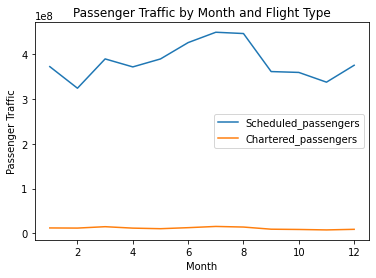

In [55]:
# Aggregate the total number of passengers for each month and flight type
passenger_traffic = df_pan.groupby('Month')['Scheduled_passengers', 'Chartered_passengers'].sum()

# Create a line chart for passenger traffic
ax = passenger_traffic.plot(kind='line')
ax.set_title('Passenger Traffic by Month and Flight Type')
ax.set_xlabel('Month')
ax.set_ylabel('Passenger Traffic')
plt.show()

C:\Users\sjsa3\AppData\Local\Temp/ipykernel_21908/1652679400.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  freight_volumes = df_pan.groupby('Month')['Scheduled_freight', 'Chartered_freight'].sum()


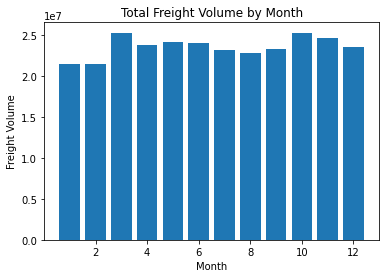

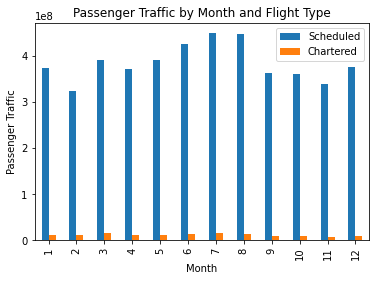

In [51]:
# Create a bar chart for freight volume
# Aggregate the total amount of freight for each month
freight_volumes = df_pan.groupby('Month')['Scheduled_freight', 'Chartered_freight'].sum()
total_freight = freight_volumes['Scheduled_freight'] + freight_volumes['Chartered_freight']

plt.bar(freight_volumes.index, total_freight)
plt.title('Total Freight Volume by Month')
plt.xlabel('Month')
plt.ylabel('Freight Volume')


### plot: across regions